<a href="https://colab.research.google.com/github/sonovman/GNN-from-scratch/blob/main/Part2_NetworkX_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Think Graph Neural Networks (GNN) are hard to understand?**

**Think Graph Neural Networks (GNN) are hard to understand?**

**Part 2** (https://youtu.be/VDzrvhgyxsU):
-----------------------------
- Graph representations 
- Adjacency Matrix
- Feature Matrix
- Incidence Matrix
- Degree Matrix
- Laplacian Matrix 
- Bag of Nodes
- Node Embedding and Node Embedding Space
- Applying Convolution to Graph similar to Image
- Message Passing
- Understanding Graph Datasets available in PyG
- Node Classification using MLP & GNN
- NetworkX and tSNE visualization of Graphs
- GNN Explainer

**Google colab notebooks** 
https://github.com/prodramp/DeepWorks/tree/main/GraphNeuralNetworks

**Part 2 PDF document:**
https://github.com/prodramp/DeepWorks/blob/main/GraphNeuralNetworks/Graph%20Neural%20Networks%20-%20Part2.pdf

#**Adjacency Matrix**

**[의문점]** 영상 강의에서는 아래와 같이 설명하고 있는데 왜 무방향에서 B to A 가 12가 아니고 -1이 되어야 하는지가 잘 이해가 되지 않음. 무방향행렬은 대칭행렬이 되어야 하는 것이 아닌지???

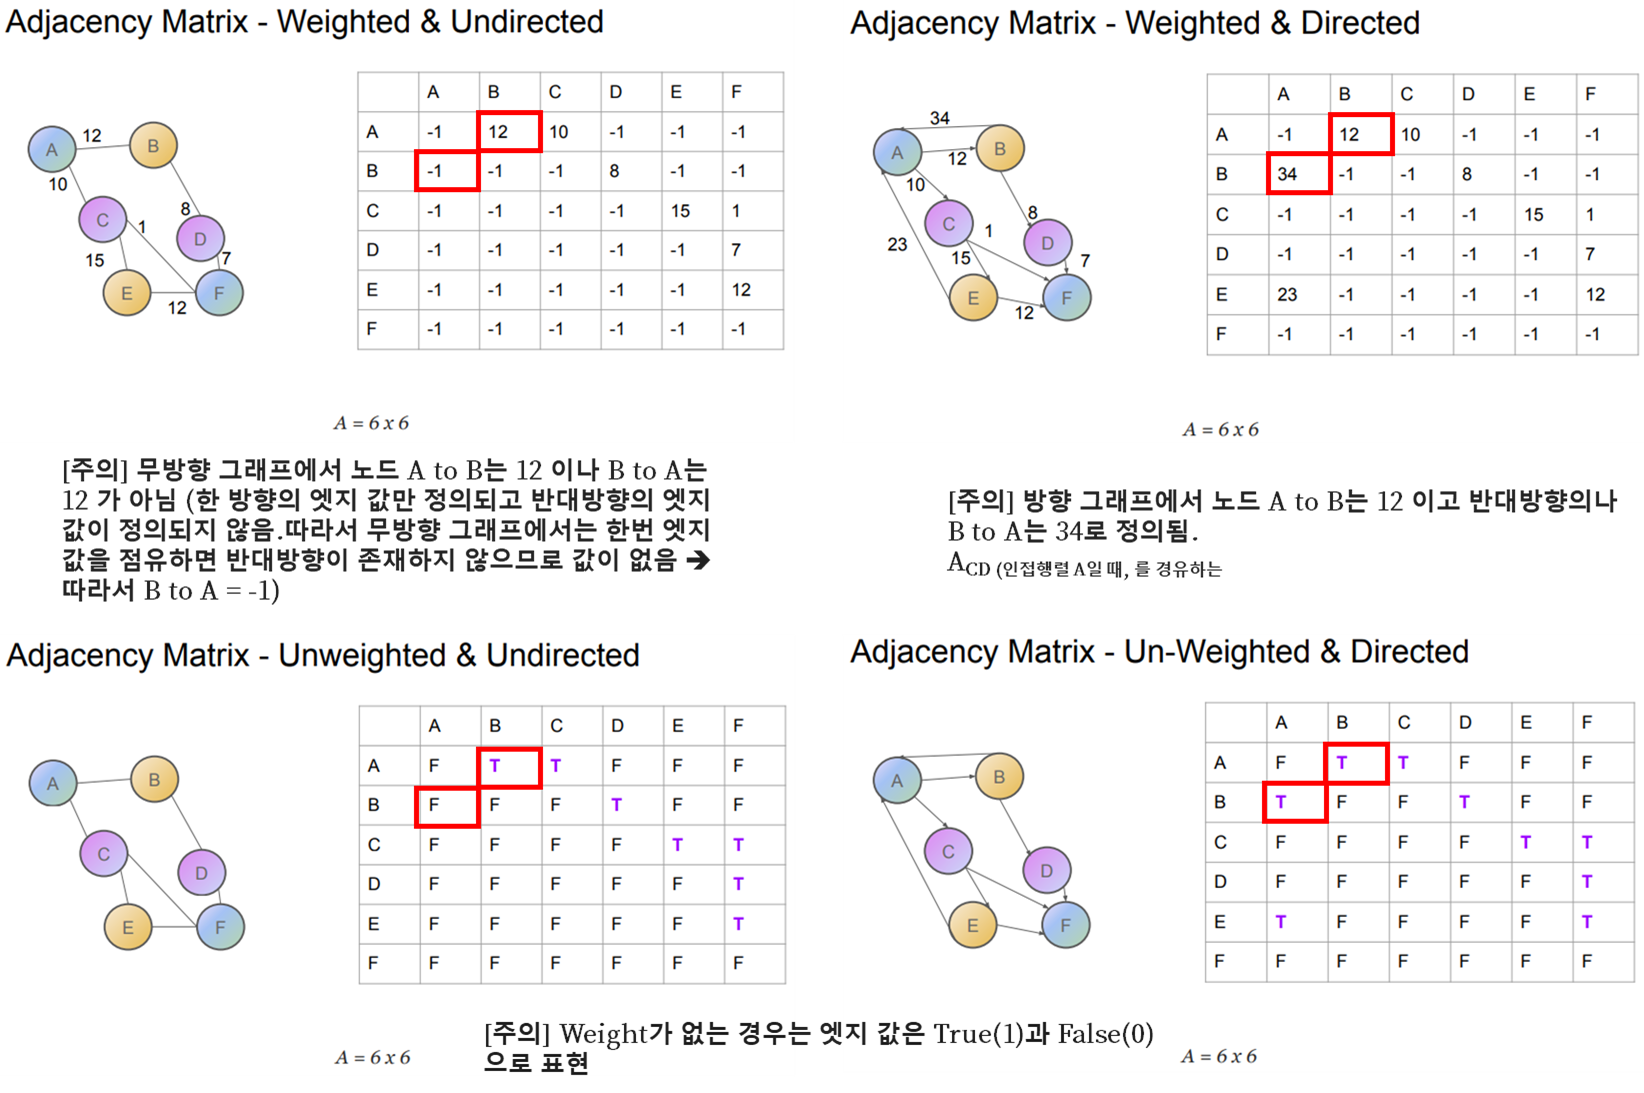

**[독학 내용] 올바로 잡기**

- 무방향 그래프의 인접행렬은 항상 대칭행렬이다.
- 무방향 그래프라는 것은 정점 a에서 b로 이동하는 간선이 있을 때 정점 b에서 a로 이동하는 간선 역시 항상 존재한다는 것을 의미하고, 그 역도 성립한다. 따라서 인접행렬 AA에 대해서 $A_{ab}$=$A_{ba}$ 가 항상 성립한다.
- 인접행렬의 모든 성분의 합은 그래프의 화살표의 개수와 같다. 이때, 무방향 간선은 양쪽으로 이어지므로 화살표 2개로 간주한다.
- 무방향 그래프에서 인접행렬의 모든 성분의 합은 간선의 개수의 2배이다


##**[인접행렬(Adjacency Matrix)]**

**[인접행렬(Adjacency Matrix)]** : 그래프를 이차원 배열로 나타내는 것.

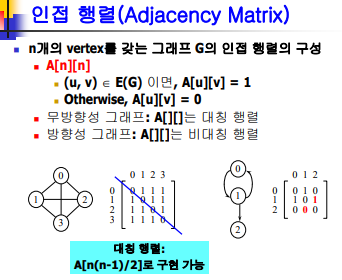

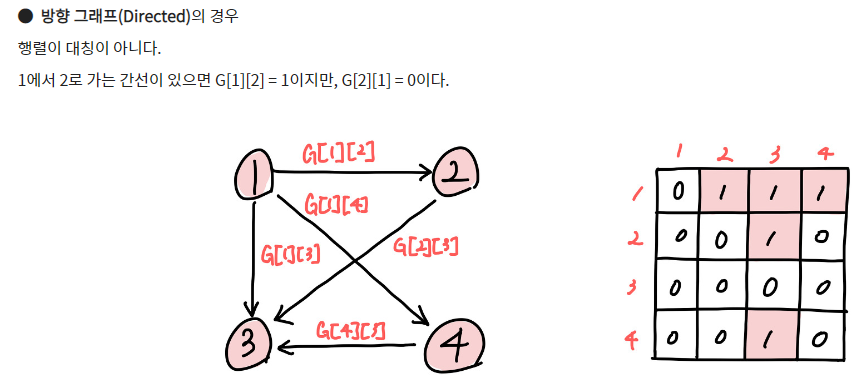

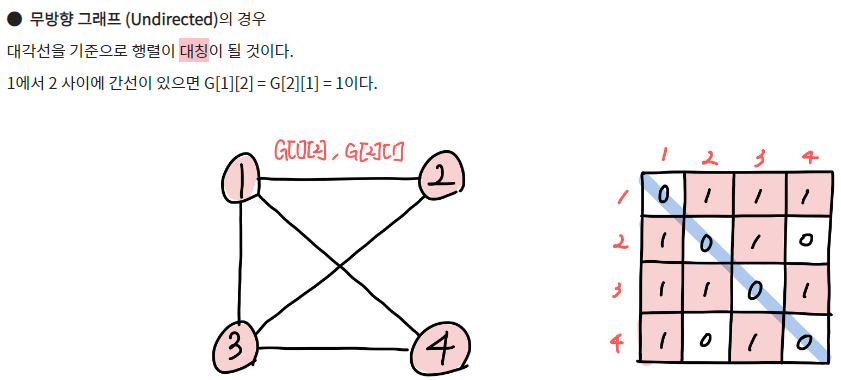

##**인접 리스트 (Adjacency List)**

인접 리스트 (Adjacency List)는 배열과 연결 리스트(Linked List)로 구현하는 리스트이다

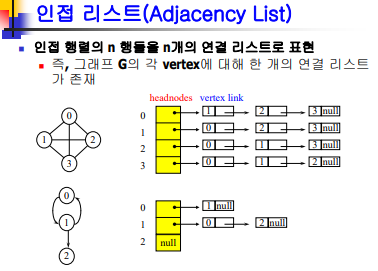

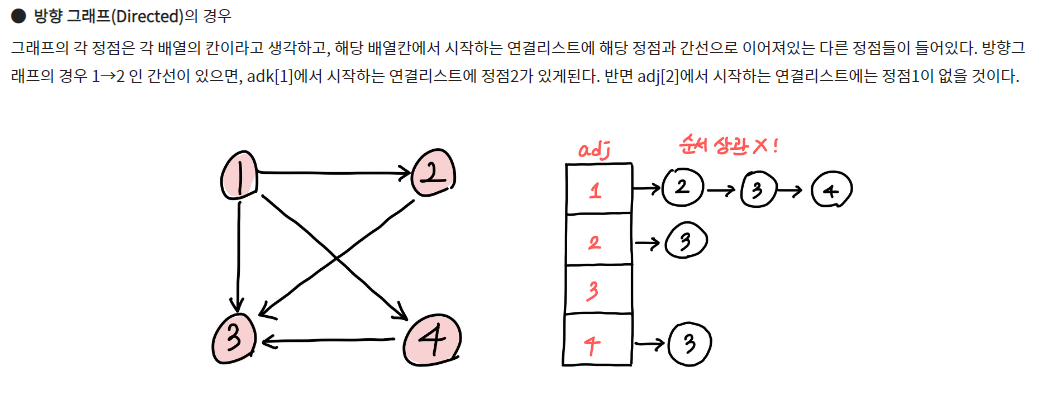

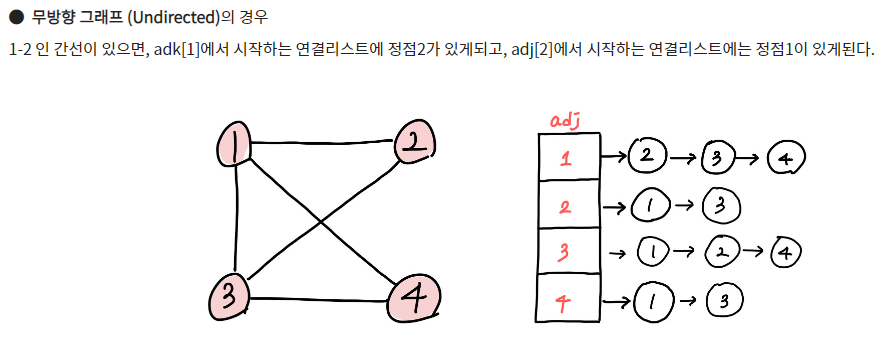

# 그래프 이론 보충학습

https://twlab.tistory.com/29

###**1. 그래프(Graph)**

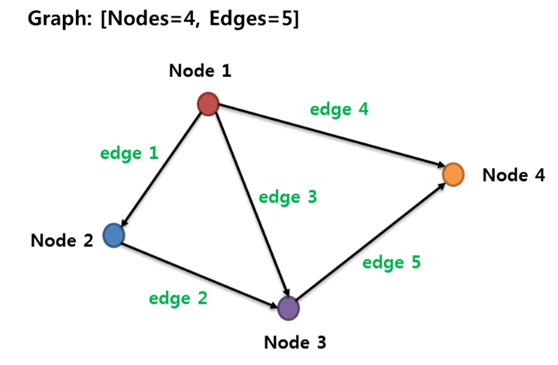

어떤 객체(node, vertex)들과 그들을 연결짓는 선(edge)을 통해 그들 사이의 관계를 네트워크로 나타낸 이산 구조

###**2. 근접행렬(Incidence Matrix)**

- 그래프의 노드 들간의 연결관계를 나타내는 행렬, 
- node와 edge로 표현되는 그래프 G (n,e)

**행렬 표현법**

- Column 는 node
- Row 는 Edge
- 출발점 노드를 -1, 끝점 노드를 1로 지정하여 표현

<비교> 인접 행렬은 node와 node와 관계로 표현

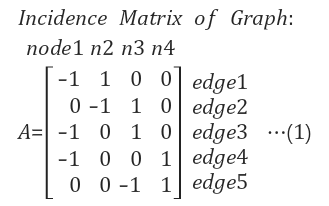

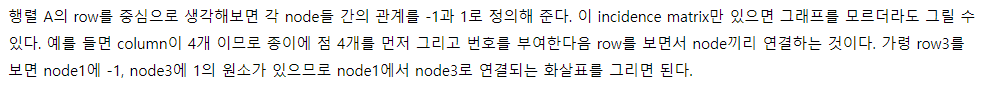

**[Loop]**

Loop : node들이 사이클로 연결되어져 있는 부분 그래프(sub-graph)
 - 예) 아래 삼각형의 꼭지점을 node라고 하고 연결선을 edge라 할 때, 세(3)개의 루프(Loop)가 존재 
 - Loop 1 = edge1, 2, 3 ; Loop 2 = edge 3,4,5 ; Loop 3 = edge 1, 2 ,4 ,5

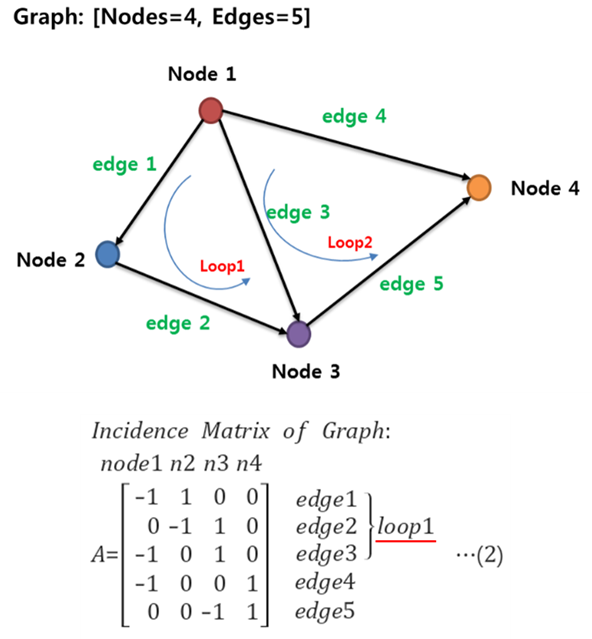

**어떤 그래프의 Loop에 대한 Incedent Matrix의 row 들은 선형종속(Linearly dependcet)한 특성을 갖는다.**

- Loop 1 = {edge1, edge 2, edge3} : 근접행렬의 row 1 ~ 3 까지
- Loop 1의 row 들은 종속(dependent)

**[MIT OpenCourse : Graphs, Networks, Incidence Matrices]** https://youtu.be/6-wh6yvk6uc

###**2-2. 근접행렬(Incidence Matrix)의 다른 표현법**

- X 축(Column) : Edge
- y 축(Row) : Node


**[무방향 그래프]**
- Node와 Edge가 연결되었으면 1, 연결되지 않았으면 0 으로 표현

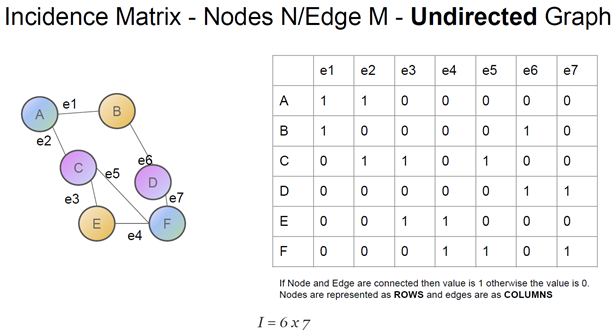

**[방향 그래프]**
- 나가는 연결 Node : -1, 들어오는 연결 Node : 1, 연결되지 않았으면 0

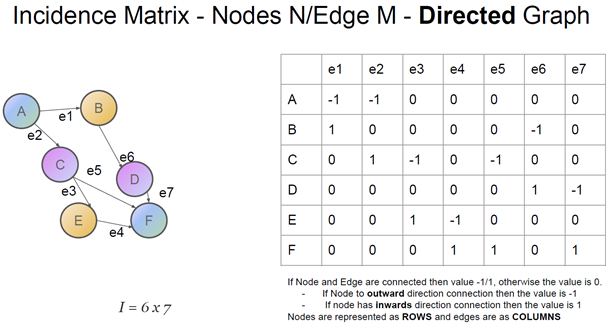

###**3. 차수행렬(Degree Matrix)(Diagonal Matrix)**

**Degree** = **Number of edges connected** to each node
- Degree matrix 는 각 대각 행렬을 제외하고는 다 0으로 표현 


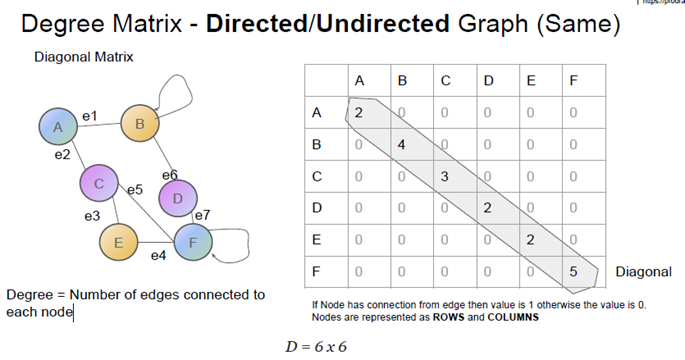

###**Laplacian Matrix - Graph Laplacian Matrix**

**라플라시안 행렬 = 차수 행렬 - 인접 행렬**

무방향 그래프에서만 구현 가능

- Measure of the smoothness of the matrix
- How quickly it changes between the Adjacent Vertices
- L = Diagonal Matrix - Adjacency Matrix
- **L = Number of Edges connected to Node - Adjacency Matrix**
- L = {D - A}

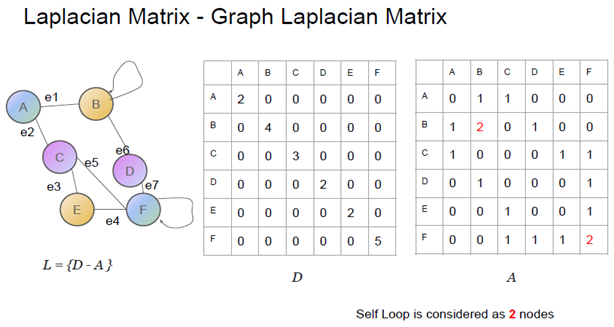

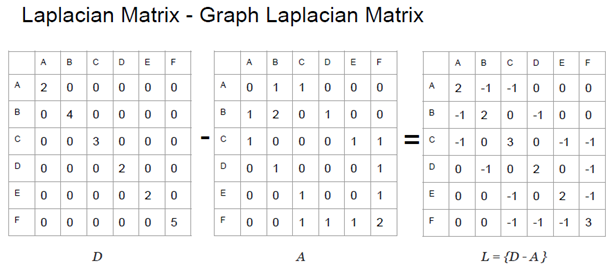

**[Self Loop 가 없는 경우]**

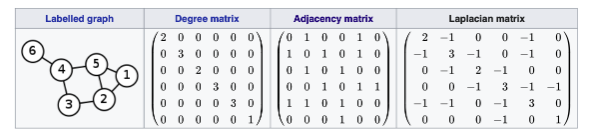

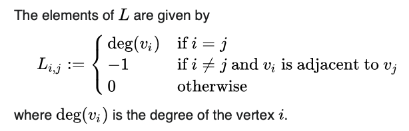

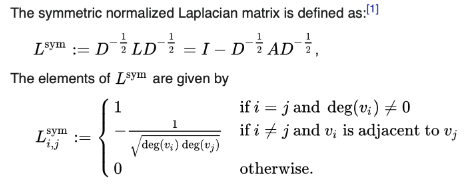

https://junklee.tistory.com/112

#실습

In [ ]:
import networkx as nx

In [ ]:
import matplotlib.pyplot as plt

## **무방향 그래프**

False
False


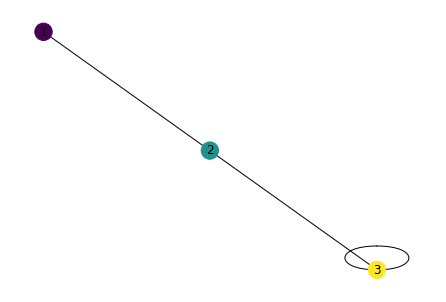

In [ ]:
# edge (1, 2)와 edge(3, 2) 추가 생성
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(3, 2)

# Adding it later (Self Loop)
G.add_edge(3,3)
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True,)
print(nx.is_weighted(G))
print(nx.is_directed(G))

#### Adj Matrix

In [ ]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0.],
        [1., 0., 1.],
        [0., 1., 1.]])

In [ ]:
import pandas as pd
d = nx.to_numpy_matrix(G)
df = pd.DataFrame(d)
display(df)

0    1    2
0  0.0  1.0  0.0
1  1.0  0.0  1.0
2  0.0  1.0  1.0

## **무방향 그래프 (가중치)**

False
False


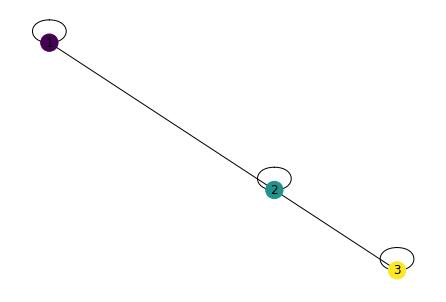

In [ ]:
G = nx.Graph() # 새로 객체 G 생성 무방향 with weight

G.add_edge(1, 2, weight=1) # 엣지 가중치 지정
G.add_edge(3, 2, weight=5) # 엣지 가중치 지정

# Adding it later : Self Loop
G.add_edge(3,3) 
G.add_edge(2,2)
G.add_edge(1,1)

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [ ]:
# 인접행렬 표현

import pandas as pd
d = nx.to_numpy_matrix(G)
df = pd.DataFrame(d)
display(df)

0    1    2
0  1.0  1.0  0.0
1  1.0  1.0  5.0
2  0.0  5.0  1.0

True
False


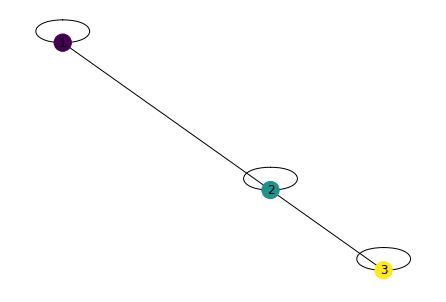

In [ ]:
G = nx.Graph() # 새로 객체 G 생성 무방향 with weight

G.add_edge(1, 2, weight=1) # 엣지 가중치 지정
G.add_edge(3, 2, weight=5) # 엣지 가중치 지정

# Adding it later : Self Loop
G.add_edge(3,3, weight=3) 
G.add_edge(2,2, weight=6)
G.add_edge(1,1, weight=9)

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [ ]:
# 인접리스트

list(G.edges())
#edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

[(1, 2), (1, 1), (2, 3), (2, 2), (3, 3)]

In [ ]:
# 인접행렬

nx.to_numpy_matrix(G)

matrix([[9., 1., 0.],
        [1., 6., 5.],
        [0., 5., 3.]])

In [ ]:
import pandas as pd
d = nx.to_numpy_matrix(G)
df = pd.DataFrame(d)
display(df)

0    1    2
0  9.0  1.0  0.0
1  1.0  6.0  5.0
2  0.0  5.0  3.0

####(Incidense_matrix)

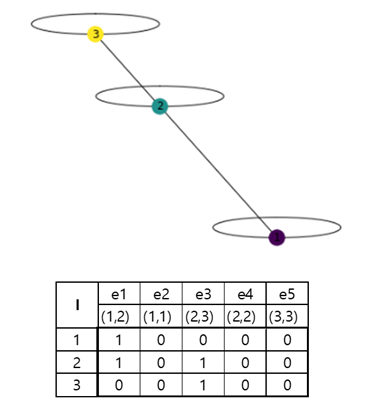

In [ ]:
I = nx.incidence_matrix(G)

In [ ]:
I.data

array([1., 1., 1., 1.])

In [ ]:
print(I)

  (0, 0)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 2)	1.0


In [ ]:
# 2X2 Matrix로 변환

I.todense() # dense matrix로 변환

matrix([[1., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

####(Adj_matrix)

In [ ]:
A = nx.adjacency_matrix(G)

In [ ]:
print(A)

  (0, 0)	9
  (0, 1)	1
  (1, 0)	1
  (1, 1)	6
  (1, 2)	5
  (2, 1)	5
  (2, 2)	3


In [ ]:
# 2X2 Matrix로 변환

A.todense() # dense matrix로 변환

matrix([[9, 1, 0],
        [1, 6, 5],
        [0, 5, 3]])

In [ ]:
A.diagonal()  ##diagonal()은 객체에서 단순히 행렬의 대각값만 추출하는 것으로 여기서는 차수 행렬이 아님

array([9, 6, 3])

**[주의] <'DiGraph' & 'Graph'> object have no attribute 'diagonal'** 

In [ ]:
#D = nx.A.diagonal()
#D.todense()
A.todense()

matrix([[9, 1, 0],
        [1, 6, 5],
        [0, 5, 3]])

[todense 사용시 대각행렬을 제외한 값이 0이 아님]

[대각행렬 함수가 반드시 차수행렬을 의미하는 것은 아님]

## **방향 그래프 (가중치)**

**<방향 with weight>**

True
True


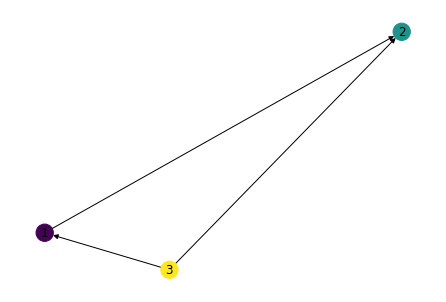

In [ ]:
G = nx.DiGraph() # 새로 객체 G 생성 <방향 with weight>

G.add_edge(1, 2, weight=1) # 엣지 및 가중치 지정
G.add_edge(3, 2, weight=5)
G.add_edge(3, 1, weight=10)

# Adding it later 
# G.add_edge(3,3)
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True,) #그래프 그리기
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [ ]:
# 근접행렬


I = nx.incidence_matrix(G)

In [ ]:
I.data

array([1., 1., 1., 1., 1., 1.])

In [ ]:
I.todense() # dense matrix로 변환

matrix([[1., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])

In [ ]:
# 대각행렬

I.diagonal()

array([1., 1., 1.])

In [ ]:
I.todense()

matrix([[1., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])

In [ ]:
# 인접행렬(값 = 가중치)

A = nx.adjacency_matrix(G)

In [ ]:
A.todense()

matrix([[ 0,  1,  0],
        [ 0,  0,  0],
        [10,  5,  0]])

## **라플라시안 행렬 only with undirected graph**

**[주의] 방향 그래프 DiGraph()에서 라플라시안 함수 사용하면 에러**

**[무방향 그래프의 라플라시안]**

True
False


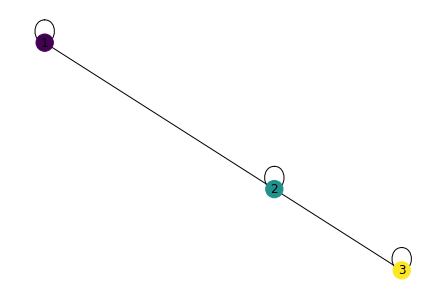

In [ ]:
G = nx.Graph() # 무방행 그래프
G.add_edge(1, 2, weight=1)
G.add_edge(3, 2, weight=5)
# Adding it later
G.add_edge(3,3, weight=3)
G.add_edge(2,2, weight=6)
G.add_edge(1,1, weight=9)

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(nx.is_weighted(G))
print(nx.is_directed(G))

###**laplacian_matrix**

라플라시안 행렬 = 차수 행렬 - 인접 행렬

L = D - A

In [ ]:
# Node: Try laplacian_matrix with both directed and undirected graph
L = nx.laplacian_matrix(G)

In [ ]:
L.data

array([ 1, -1, -1,  6, -5, -5,  5])

In [ ]:
L.todense()

matrix([[ 1, -1,  0],
        [-1,  6, -5],
        [ 0, -5,  5]])

**[인접행렬]**

In [ ]:
# 값은 가중치

A = nx.adjacency_matrix(G)

In [ ]:
A.data

array([9, 1, 1, 6, 5, 5, 3])

In [ ]:
A.shape

(3, 3)

In [ ]:
A.todense()

matrix([[9, 1, 0],
        [1, 6, 5],
        [0, 5, 3]])

In [ ]:
A = nx.to_numpy_matrix(G) 

In [ ]:
A

matrix([[9., 1., 0.],
        [1., 6., 5.],
        [0., 5., 3.]])

In [ ]:
D = A.diagonal()

diagonal()는 graph를 직접 객체로 사용불가능

In [ ]:
#D = G.diagonal() : AttributeError: 'Graph' object has no attribute 'diagonal'

In [ ]:
D

matrix([[9., 6., 3.]])

In [ ]:
L1 = D-A

In [ ]:
L1

matrix([[ 0.,  5.,  3.],
        [ 8.,  0., -2.],
        [ 9.,  1.,  0.]])

In [ ]:
G.edges

EdgeView([(1, 2), (1, 1), (2, 3), (2, 2), (3, 3)])

In [ ]:
G.nodes

NodeView((1, 2, 3))

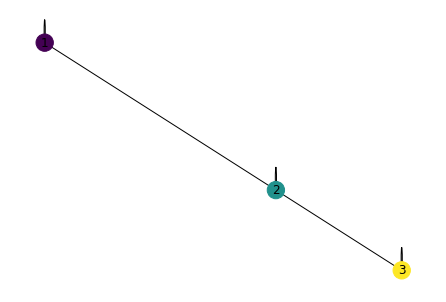

In [ ]:
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)

# **Representing Graph in class framework**

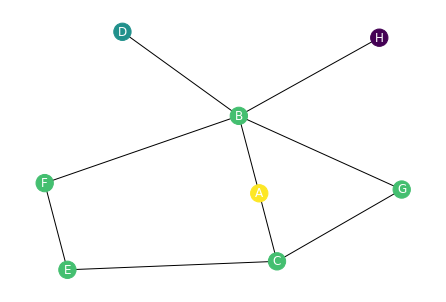

In [ ]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5,
          # 'F': 0.7, node_color values
          # 'G': 0.9, node_color values
           'H': 0.0}

values = [val_map.get(node, .7) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

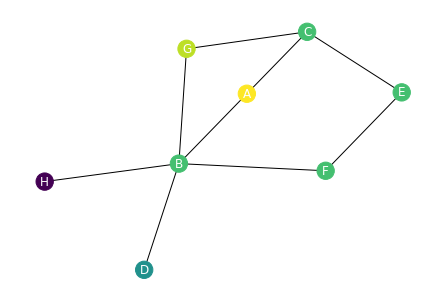

In [ ]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0, #node_color values (1~0)
           'D': 0.5,
           'F': 0.7,
           'G': 0.9,
           'H': 0.0}

values = [val_map.get(node, .7) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

False
False


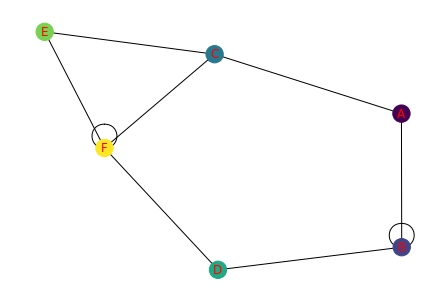

In [ ]:
#G = nx.DiGraph() # for Laplacian Matrix you can not use the directed graph
G = nx.Graph() 
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')
     ])

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 4.0, 'E': 5.0, 'F': 6.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=values, font_color='red')

print(nx.is_weighted(G))
print(nx.is_directed(G))

In [ ]:
A = nx.adjacency_matrix(G)

In [ ]:
A.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(A.todense())

[[0 1 1 0 0 0]
 [1 1 0 1 0 0]
 [1 0 0 0 1 1]
 [0 1 0 0 0 1]
 [0 0 1 0 0 1]
 [0 0 1 1 1 1]]


In [ ]:
A.setdiag(A.diagonal())

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
print(A.diagonal())

[0 1 0 0 0 1]


In [ ]:
# D = A.diagonal()  #diagonal()은 객체에서 단순히 행렬의 대각값만 추출
# D.todense() : 'numpy.ndarray' object has no attribute 'todense'

In [ ]:
L = nx.laplacian_matrix(G)

In [ ]:
L.todense()

matrix([[ 2, -1, -1,  0,  0,  0],
        [-1,  2,  0, -1,  0,  0],
        [-1,  0,  3,  0, -1, -1],
        [ 0, -1,  0,  2,  0, -1],
        [ 0,  0, -1,  0,  2, -1],
        [ 0,  0, -1, -1, -1,  3]])

# **The Example used in the Part 2 Notes**

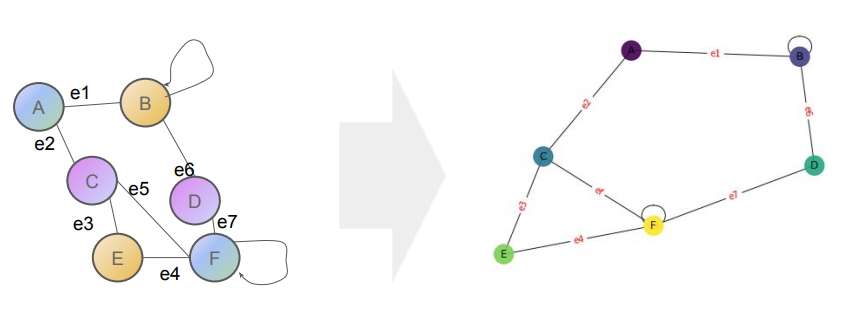

False
False


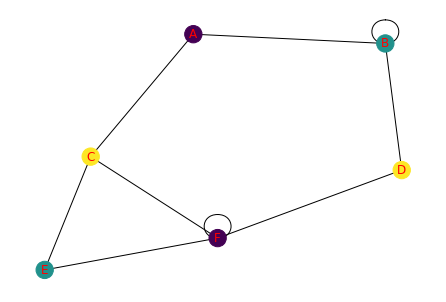

In [ ]:
#G = nx.DiGraph() # for Laplacian Matrix you can not use the directed graph
G = nx.Graph() 
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')
     ])

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 3.0, 'E': 2.0, 'F': 1.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True,  node_color=values, font_color='red')
# with_labels=True : 엣지에 라벨 표시
# node_color=values : 노드 범주(Class)를 색깔로 구분

print(nx.is_weighted(G))
print(nx.is_directed(G))

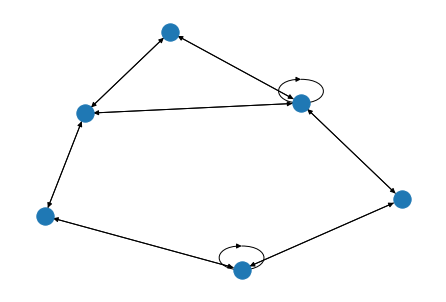

In [ ]:
# Trick (방향 그래프로)
nx.draw(G.to_directed())

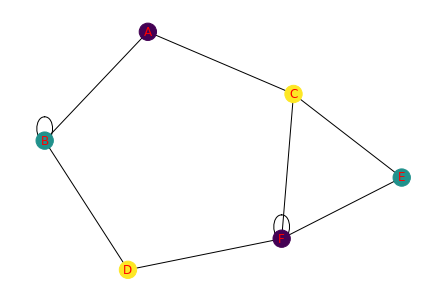

In [ ]:
# 무방향 그래프
#nx.draw(G.to_directed())
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True,  node_color=values, font_color='red')

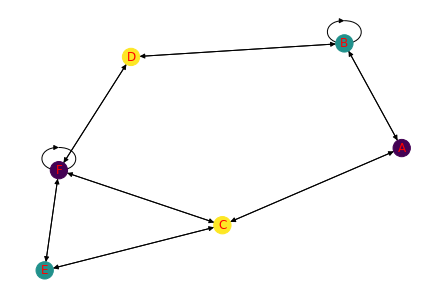

In [ ]:
# Trick (방향 그래프로)
#nx.draw(G.to_directed())
nx.draw(G.to_directed(), cmap=plt.get_cmap('viridis'), with_labels=True,  node_color=values, font_color='red')

In [ ]:
I = nx.incidence_matrix(G)

In [ ]:
I.todense()

matrix([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0.]])

# **Rendering all nodes and edges**

In [ ]:
# 엣지 라벨 정의

edge_labels={('A', 'B'): 'e1',  ('A', 'C'): 'e2', ('C', 'E'): 'e3', ('E', 'F'): 'e4', ('C', 'F'): 'ef', ('B', 'D'): 'e6', ('D', 'F'): 'e7'
  , ('B', 'B'): 'e8', ('F', 'F'): 'e9'
 }

# all_edge 행렬(집합) 생성
all_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')
     ]

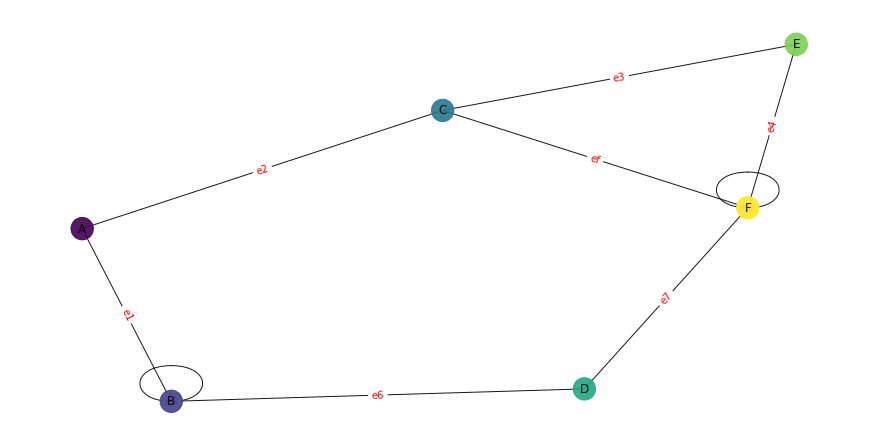

False
False


In [ ]:
#G = nx.DiGraph() # for Laplacian Matrix you can not use the directed graph
G = nx.Graph() # 무방향

G.add_edges_from(all_edges) #all_edge 행렬로부터 엣지 추가
    

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 4.0, 'E': 5.0, 'F': 6.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]

# 엣지에 엣지 레이블 또는 가중치 표시

pos = nx.spring_layout(G)
plt.figure(figsize=(12,6))
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color=values, alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,  #edge_labels 행렬이용
    font_color='red'
)

plt.axis('off')
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

6
9


In [ ]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 1., 1.]])

In [ ]:
nx.to_numpy_matrix(G.to_directed())

matrix([[0., 1., 1., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 1., 1.]])

## **Adjacency Matrix**

In [ ]:
A = nx.adjacency_matrix(G)

In [ ]:
A.todense()

matrix([[0, 1, 1, 0, 0, 0],
        [1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 1],
        [0, 0, 1, 1, 1, 1]])

In [ ]:
A.diagonal()

array([0, 1, 0, 0, 0, 1])

**[주의] Selp Loop 값 (2) 반영되지 않음**

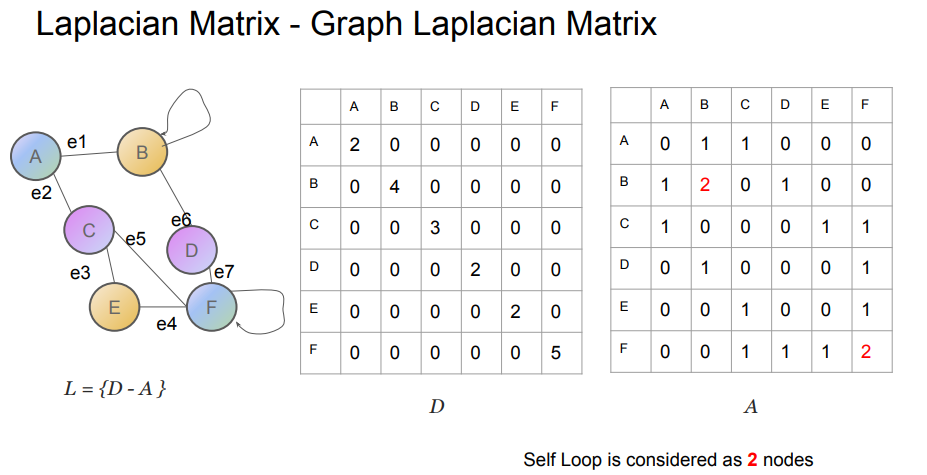

In [ ]:
# 인접리스트 생성

for line in nx.generate_adjlist(G):
  print(line)

A B C
B D B
C E F
D F
E F
F F


# **Listing all adjecent nodes**

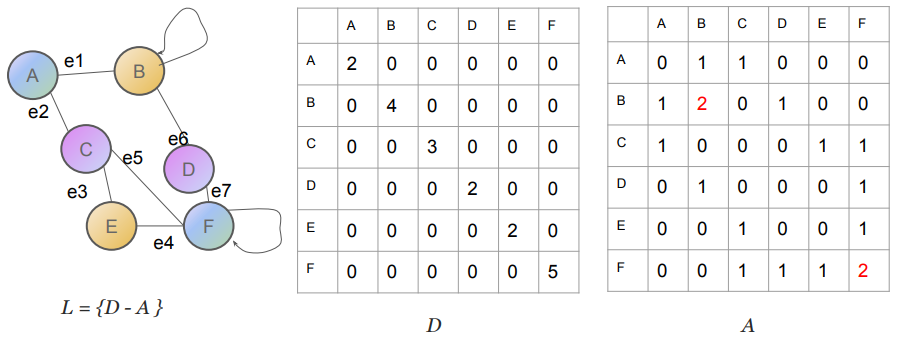

In [ ]:
# 인접리스트 생성 함수

def get_adjanct_list_with_all_edges(graph_val):
     for s, neighbors in graph_val.adjacency():
        line = str(s) + ' : '
        for t, data in neighbors.items():
                line += str(t) + ' - '
        yield line[: -len(' ')]

In [ ]:
for line in get_adjanct_list_with_all_edges(G):
    print(line)

A : B - C -
B : A - D - B -
C : A - E - F -
D : B - F -
E : C - F -
F : C - E - D - F -


# **Incidence Matrix**

In [ ]:
I = nx.incidence_matrix(G)

In [ ]:
I.todense()

matrix([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0.]])

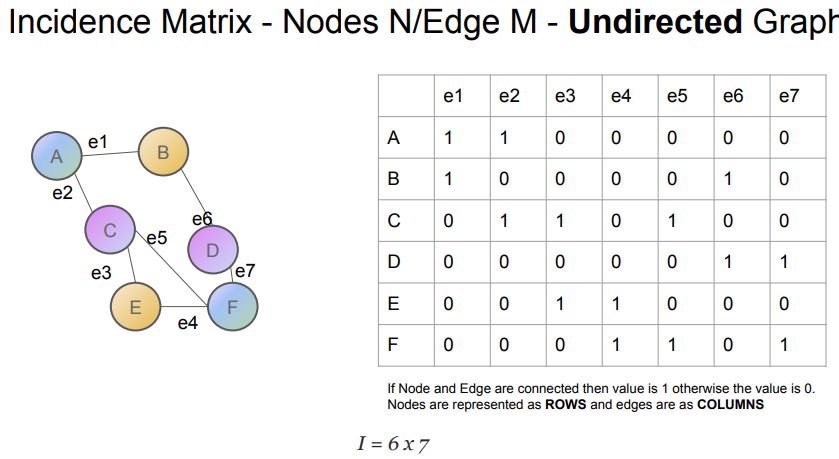

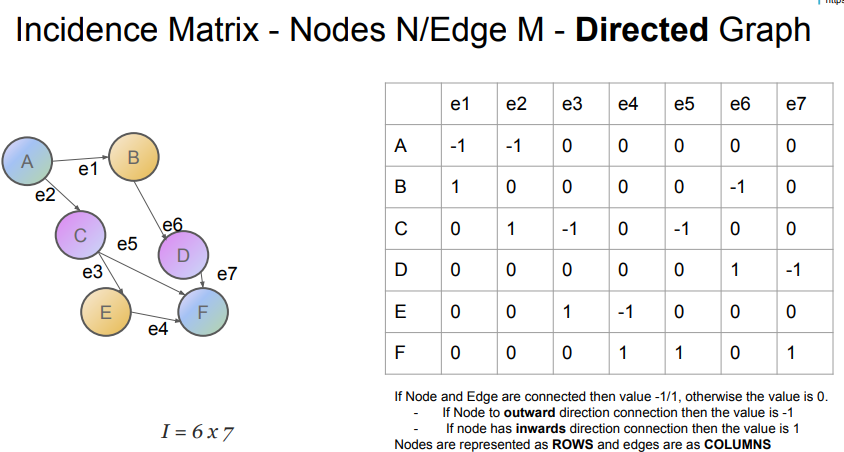

# **Node Degree**

- **Degree_matrix (차수 행렬)**
- Degree = Number of edges connected to each node 
- Degree matrix 는 각 대각 행렬을 제외하고는 모두 0

In [ ]:
G.degree()

DegreeView({'A': 2, 'B': 4, 'C': 3, 'D': 2, 'E': 2, 'F': 5})

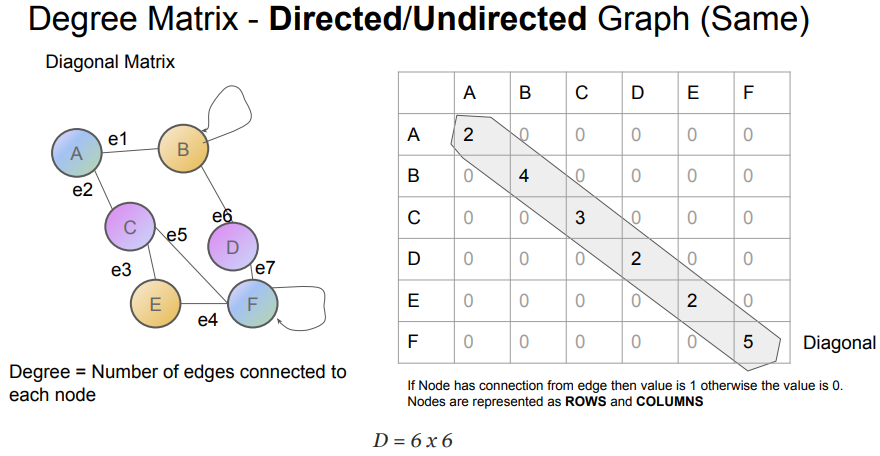

# **Laplacian Matrix**

In [ ]:
L = nx.laplacian_matrix(G)

In [ ]:
L.todense()

matrix([[ 2, -1, -1,  0,  0,  0],
        [-1,  2,  0, -1,  0,  0],
        [-1,  0,  3,  0, -1, -1],
        [ 0, -1,  0,  2,  0, -1],
        [ 0,  0, -1,  0,  2, -1],
        [ 0,  0, -1, -1, -1,  3]])

In [ ]:
L.todense().diagonal()

matrix([[2, 2, 3, 2, 2, 3]])

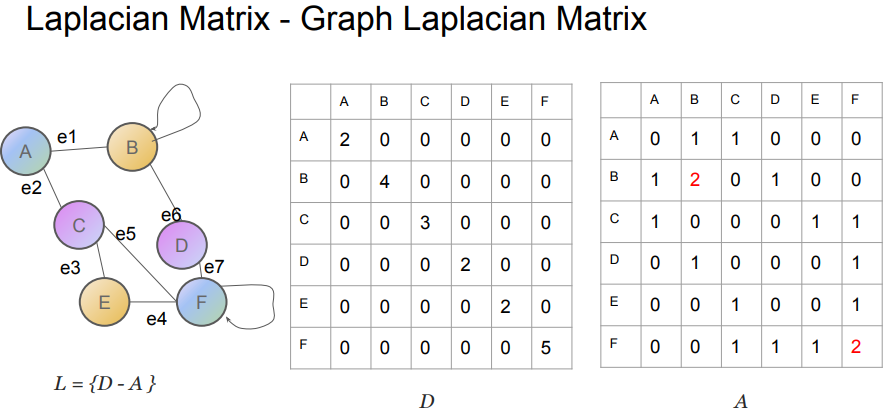

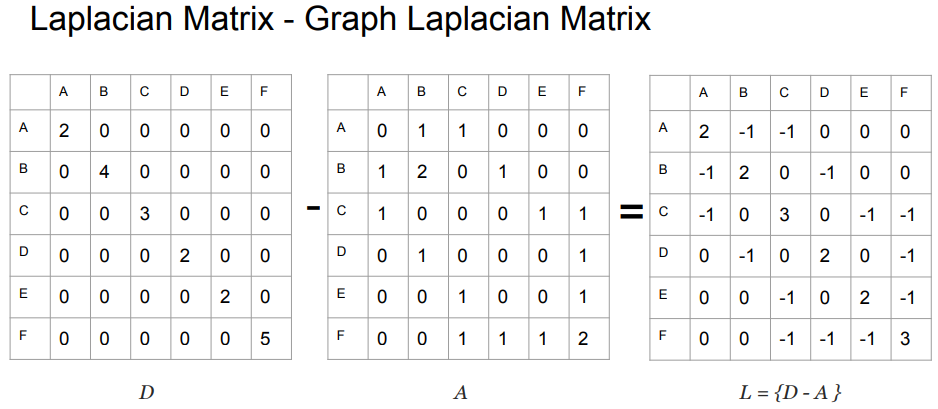

# **Graph Representation**

- 필독 **[Graph Representation Learning Book]**
https://www.cs.mcgill.ca/~wlh/grl_book/

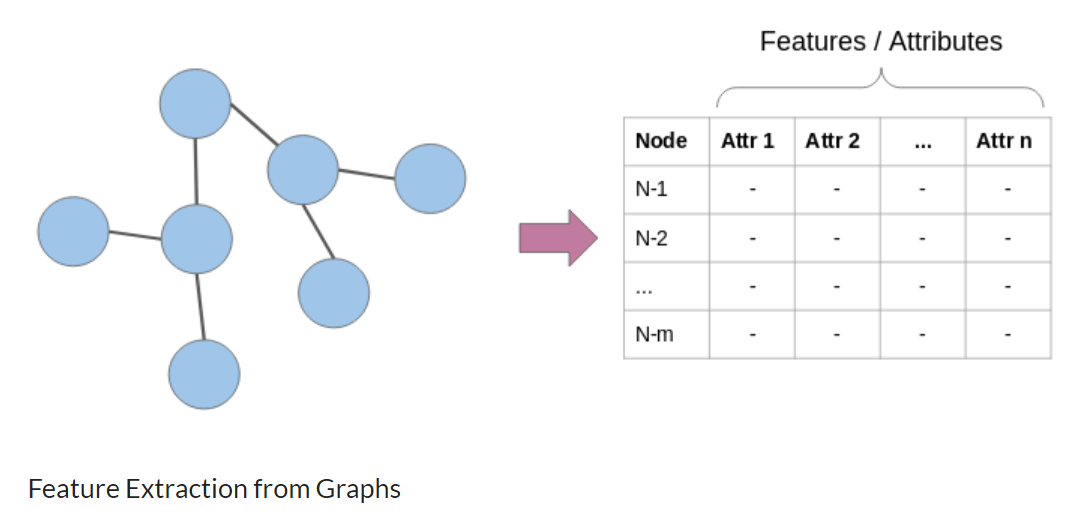

The features extracted from a graph can be broadly divided into **three categories**:

- **Node Attributes**: We know that the nodes in a graph represent entities and these entities have their **own characteristic attributes**. We can use these attributes as features for each and every node. For example, in an airline route network, the nodes would represent the airports. **These nodes would have features like aircraft capacity, number of terminals, landing area, etc.**

- **Local Structural Features**: **Node features like degree (count of adjacent nodes)**, mean of degrees of neighbor nodes, number of triangles a node forms with other nodes, etc.

- **Node Embeddings**: The above-discussed features carry only node related information. They do not capture the information about the context of a node. By context, I mean **the surrounding nodes**.** Node embeddings address this issue to a certain extent by representing every node by a fixed-length vector.** These vectors are able to capture information about the surrounding nodes (contextual information)

Two important modern-day algorithms for learning **node embeddings** are **DeepWalk** and **Node2Vec**. 

##**[Feature Extraction for Graphs]**

**[Feature Extraction for Graphs]**
https://towardsdatascience.com/feature-extraction-for-graphs-625f4c5fb8cd

We’ve seen 3 major types of features that can be extracted from graphs: node level, graph level, and neighbourhood overlap features. Node level features such as node degree, or eigenvector centrality generate features for each individual node whereas graph level features such as WL, or Graphlet kernels capture information from the whole graph at once. Neighbourhood overlap features, for example, Sorensen index or LHN similarity, create features that measure a common neighbourhood between two nodes.

#### **1) Node Level Features**

- Node Degree
- Eigenvector Centrality
- Clustering Coefficient
- DeepWalk

#### **2) Graph Level Features**

- Adjacency Matrix
- Laplacian Matrix
- Bag of Nodes
- Weisfeiler-Lehman Kernel
- Graphlet Kernels
- Path-based Kernels

#### **3) Neighbourhood Overlap Features**

- Local Overlap Measures
- Global Overlap Measures

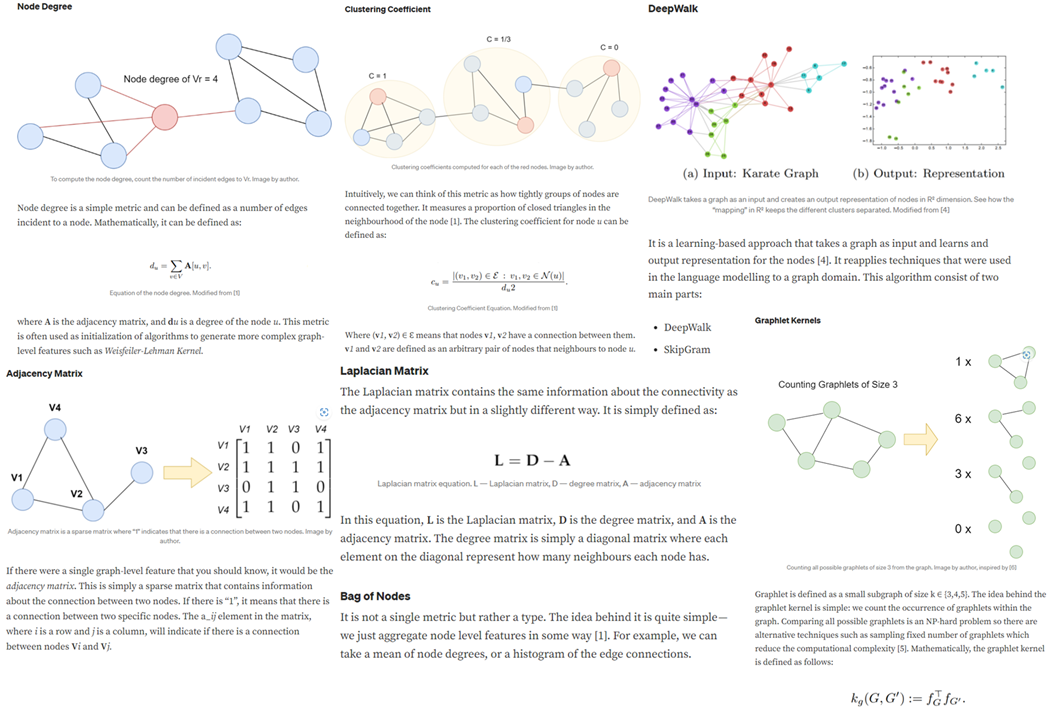

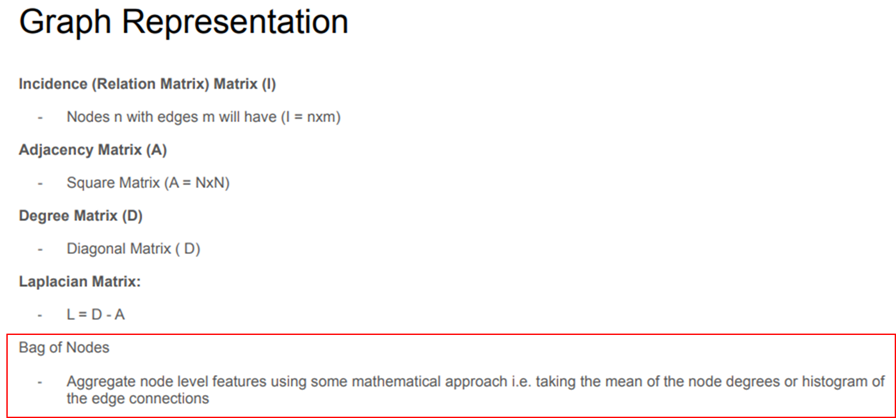

# **Bag of Nodes**

**Bag of Nodes**

It is not a single metric but rather a type. The idea behind it is quite simple — we just aggregate **node level features **in some way [1]. 

For example, we can take a mean of **node degrees**, or **a histogram of the edge connections**.



**Weisfeiler-Lehman Kernel**

WL Kernel is an improvement of the Bag of Nodes approach where we **iteratively aggregate information from the node’s neighbourhoods** [1].
WL 커널은 **노드 인접 정보를 반복적으로 집계하는 Bag of Nodes 접근 방식의 개량**이다.

The algorithm can be summarized in a few steps [1]:

- Set an initial label to each node of the graph, for example a node’s degree
(그래프의 각 노드에 대한 초기 레이블 설정(예: 노드의 차수))
- Iteratively assign a new label to each node using hashed labels from the neighbourhood (인접정보로부터 해시 레이블을 사용하여 각 노드에 새 레이블을 반복적으로 할당)
- After K iterations, we now have gathered information from K-hop neighbourhood. K 반복 후, 이제 K-hop 이웃으로부터 정보를 수집.

We can then use any type of Bag of Nodes metrics to summarize these new labels
그런 다음 모든 유형의 Bag of Nodes 메트릭을 사용하여 이러한 새로운 레이블을 요약할 수 있다.

https://medium.com/@hacertilbec/introduction-to-cheminformatics-circular-fingerprints-f557cdc77492

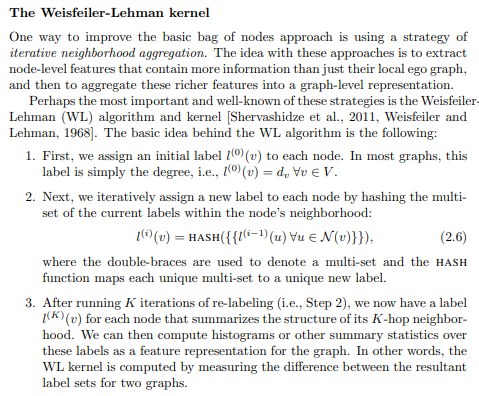

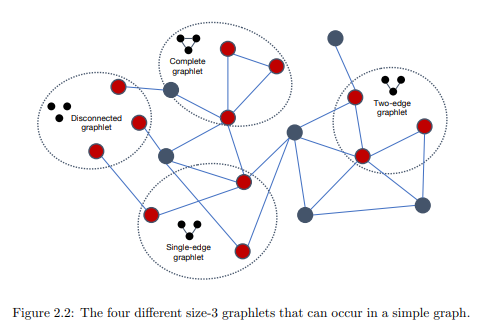

# **Graph Walking**
- Traversing the graph through the connected nodes 연결노드를 통해 모든 그래프를 순회하는 방법
- Reference: https://www.analyticsvidhya.com/blog/2019/11/graph-feature-extraction-deepwalk/

In the DeepWalk we apply a random walk generator to generate short sequences of nodes. Then, SkipGram is applied to encode vertices into lower dimensional space using the generated sequences of nodes. DeepWalk에서 우리는 노드의 짧은 시퀀스를 생성하기 위해 random walk generator를 적용한다. 그런 다음 SkipGram을 적용하여 생성된 노드 시퀀스를 사용하여 정점을 저차원 공간으로 인코딩한다.

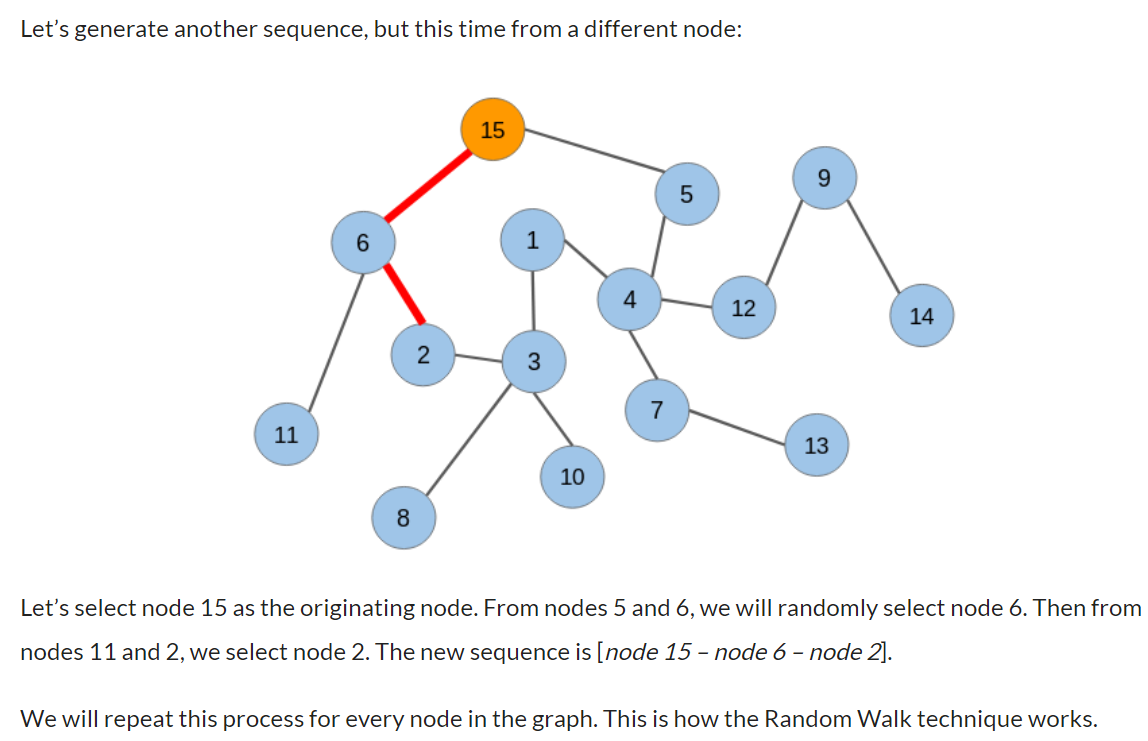

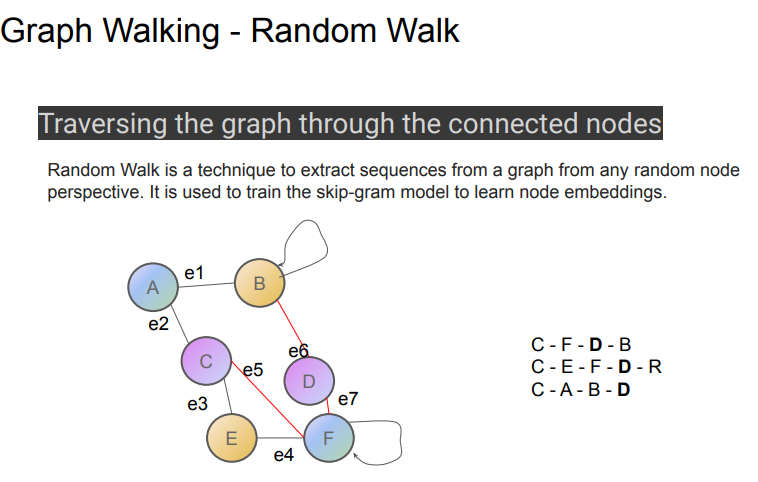

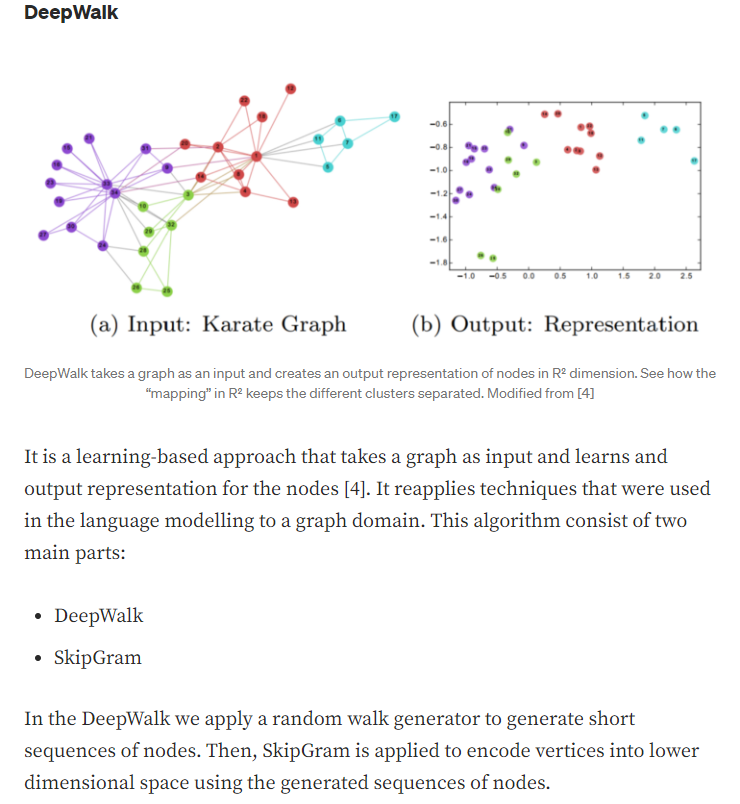

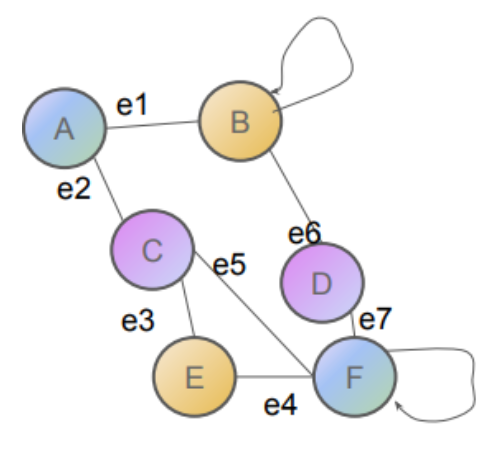

In [98]:
import random
def get_randomwalk(graph_val, node, path_length):
    
    random_walk = [node] #랜덤워크 노드
    
    for i in range(path_length-1):
        temp = list(graph_val.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [99]:
get_randomwalk(G, 'E', 5) #그래프 G에서 노드 E로부터 경로 길이 5 레벨내에 있는 임의 노드

['E', 'C', 'A', 'B', 'D']

In [101]:
get_randomwalk(G, 'E', 3) 

['E', 'F', 'C']

In [100]:
 # 10 레벨내 최대 워크 노드 수

from tqdm import tqdm
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(10): # 10 레벨내
        random_walks.append(get_randomwalk(G, n, i))
        
# count of sequences
len(random_walks) # 3 레벨내 최대 워크 크기 (노드 수

100%|██████████| 6/6 [00:00<00:00, 3445.96it/s]


60

In [102]:
 # 3 레벨내 최대 워크 노드 수
 
from tqdm import tqdm
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(3): # 3 레벨내 
        random_walks.append(get_randomwalk(G, n, i))
        
# count of sequences
len(random_walks) # 3 레벨내 최대 워크 크기 (노드 수)

100%|██████████| 6/6 [00:00<00:00, 1524.65it/s]


18

[참고]

tqdm은 Python에서 Progress Meter 또는 Progress Bar를 만드는 데 사용되는 라이브러리

반복문을 돌리면 작업이 어디까지 진행된 건지, 되고는 있는 건지 궁금할 때가 많이 있다. 주피터 노트북 화면을 바라보며 반복문을 돌린 셀의 별표가 사라지길 계속 기다리기도 조금 답답하다. 이럴 때 진행 상황을 확인하는 가장 쉬운 방법은 반복문 중간에 print 찍도록 코드를 작성하는 것이다. 하지만 이 방법은 직관적으로 한눈에 진행 상황을 파악하기에는 무리가 있다. 

파이썬에는 이럴 때 사용할 수 있는 tqdm 라이브러리가 있다. 이 라이브러리를 이용하면 진행 상황을 Progress Bar 형태로 한눈에 확인할 수 있다.

반복 가능한(iterable) 대상이라면 어느 것이든 tqdm 함수 넣고 실행하면 된다.

In [103]:
import time
from tqdm import tqdm

for i in tqdm(range(10)):
    time.sleep(0.1)

100%|██████████| 10/10 [00:01<00:00,  9.83it/s]
